In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#### 전처리 후 새로운 데이터프레임으로 저장 > 'eda.csv'
1. 결측치 제거
2. 이상치 제거
- passenger_count > 6인 데이터 삭제
- pickup_latitude, dropoff_latitude(위도) : -90~90으로 설정, 0이하 삭제, 뉴욕의 위도 범위 벗어나는 데이터(39이하, 46이상) 삭제
- pickup_longitude, dropoff_longitude(경도) : -180~180으로 설정, 0이상 삭제, 뉴욕의 경도 범위 벗어나는 데이터(-80이하, -71이상) 삭제
- fare_amount <= 0인 데이터 삭제

#### > 전처리 후 데이터 54,268,870개
- 전처리 과정에서 1,154,986개 삭제 (전처리 전 : 55,423,856개)

#### 변수 생성 후 새로운 데이터프레임으로 저장 > 'eda3.csv'
1. 파생변수 - 날짜데이터
- log_date (날짜), log_time (시간), log_hour (시), log_min (분), log_year (연), log_month (월), log_day (일)
- 7to15 (할증 x), 16to19 (할증 o), 20to6 (할증 o) : 시간변수 그룹화 (이진변수)
- dayofweek (요일변수) : 월요일(1) ~ 일요일(7)
- weekday (주중, 주말 구분) : 주중(1), 주말(0)
- is_extracharge : 추가 요금(할증) 여부

#### 변수 생성 후 새로운 데이터프레임으로 저장 > 'eda5.csv'
2. 추가변수
- taxi_amount (택시 개수) : 승객 1 ~ 4명(1), 승객 5 ~ 6명(2)
- distance (거리)

#### > distance (거리) 이상치(0 이하인 값) 제거 후 데이터 53,692,483개
- 전처리 과정에서 576,387개 삭제 (전처리 전 : 54,268,870개)

=======================================================================================================================

In [2]:
eda5_df = pd.read_csv("E:\eda5.csv")

In [3]:
eda5_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
eda5_df.iloc[:5,:]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,log_date,...,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,2009-06-15,...,6,15,0,1,0,1,1,1,1,412.061196
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,2010-01-05,...,1,5,0,1,0,2,1,1,1,4646.229208
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,2011-08-18,...,8,18,0,0,1,4,1,1,1,1004.797031
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,2012-04-21,...,4,21,0,0,1,6,0,1,1,914.153776
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,2010-03-09,...,3,9,1,0,0,2,1,0,1,1366.163592


In [5]:
eda5_df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'time', 'log_date', 'log_time', 'log_hour',
       'log_min', 'log_year', 'log_month', 'log_day', '7to15', '16to19',
       '20to6', 'dayofweek', 'weekday', 'is_extracharge', 'taxi_amount',
       'distance'],
      dtype='object')

In [6]:
eda5_df.shape

(53692483, 24)

#### fare과 distance 간의 상관관계

<AxesSubplot:xlabel='distance', ylabel='fare_amount'>

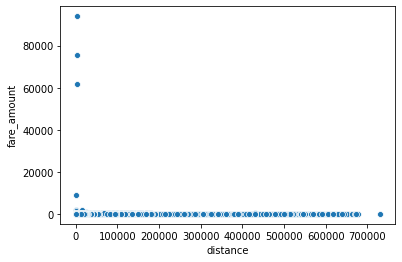

In [7]:
sns.scatterplot(data=eda5_df, x='distance', y='fare_amount')

In [9]:
eda5_df[['distance', 'fare_amount']].corr()

,distance,fare_amount
distance,1.000000,0.340138
fare_amount,0.340138,1.000000


In [ ]:
# sns.heatmap(eda4_df[['distance', 'fare_amount']].corr(), annot=True)

#### distance 분포 살펴보기

In [8]:
eda5_df['distance'].describe()

count    5.369248e+07
mean     2.761961e+03
std      4.357065e+03
min      2.925956e-02
25%      8.769466e+02
50%      1.576154e+03
75%      2.863117e+03
max      7.308301e+05
Name: distance, dtype: float64

<AxesSubplot:>

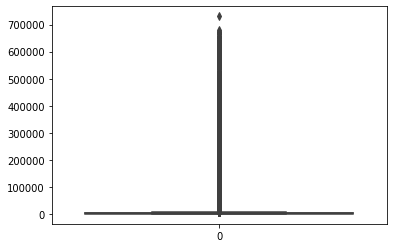

In [10]:
sns.boxplot(data=eda5_df['distance'])

=======================================================================================================================

### 샘플 1,000,000개로 모델 돌리기

In [11]:
sample_df = eda5_df.sample(n=1000000)

In [12]:
sample_df.index

Int64Index([32990784, 20071373,  3149189, 47596648, 19704631, 13545053,
            17912414,  5187936,  9156837, 32027249,
            ...
            35114607, 53167399,  8003661, 22495559, 22590358,  7668269,
            14076373, 48993562, 22807276, 33433455],
           dtype='int64', length=1000000)

In [13]:
sample_df.to_csv("E:\sample.csv")

#### > 샘플 1,000,000개 뽑아서 'sample.csv' 파일로 저장

=======================================================================================================================

In [2]:
sample_df = pd.read_csv("E:\sample.csv")

In [3]:
sample_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
sample_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,log_date,...,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,distance
0,2012-03-21 20:36:00.000000177,6.1,2012-03-21 20:36:00 UTC,-73.978027,40.758847,-73.990142,40.751812,2,2012-03-21 20:36:00,2012-03-21,...,3,21,0,0,1,3,1,1,1,1369.393049
1,2014-04-14 00:32:23.0000001,8.0,2014-04-14 00:32:23 UTC,-74.000492,40.729948,-74.007631,40.740661,2,2014-04-14 00:32:23,2014-04-14,...,4,14,0,0,1,1,1,1,1,862.274757
2,2011-12-03 07:38:27.0000001,15.3,2011-12-03 07:38:27 UTC,-73.940000,40.810400,-73.972000,40.750100,0,2011-12-03 07:38:27,2011-12-03,...,12,3,1,0,0,6,0,0,1,4027.205281
3,2011-09-04 13:07:00.000000102,13.7,2011-09-04 13:07:00 UTC,-73.984950,40.724120,-73.999910,40.762795,1,2011-09-04 13:07:00,2011-09-04,...,9,4,1,0,0,7,0,0,1,2050.872278
4,2011-11-21 21:50:29.0000003,6.9,2011-11-21 21:50:29 UTC,-73.985356,40.760371,-73.970509,40.759209,2,2011-11-21 21:50:29,2011-11-21,...,11,21,0,0,1,1,1,1,1,1657.431190


#### 0. train_data, test_data 분할

In [29]:
sample_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,log_date,...,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,distance
0,2012-03-21 20:36:00.000000177,6.1,2012-03-21 20:36:00 UTC,-73.978027,40.758847,-73.990142,40.751812,2,2012-03-21 20:36:00,2012-03-21,...,3,21,0,0,1,3,1,1,1,1369.393049
1,2014-04-14 00:32:23.0000001,8.0,2014-04-14 00:32:23 UTC,-74.000492,40.729948,-74.007631,40.740661,2,2014-04-14 00:32:23,2014-04-14,...,4,14,0,0,1,1,1,1,1,862.274757
2,2011-12-03 07:38:27.0000001,15.3,2011-12-03 07:38:27 UTC,-73.940000,40.810400,-73.972000,40.750100,0,2011-12-03 07:38:27,2011-12-03,...,12,3,1,0,0,6,0,0,1,4027.205281
3,2011-09-04 13:07:00.000000102,13.7,2011-09-04 13:07:00 UTC,-73.984950,40.724120,-73.999910,40.762795,1,2011-09-04 13:07:00,2011-09-04,...,9,4,1,0,0,7,0,0,1,2050.872278
4,2011-11-21 21:50:29.0000003,6.9,2011-11-21 21:50:29 UTC,-73.985356,40.760371,-73.970509,40.759209,2,2011-11-21 21:50:29,2011-11-21,...,11,21,0,0,1,1,1,1,1,1657.431190


In [28]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  1000000 non-null  float64
 6   dropoff_latitude   1000000 non-null  float64
 7   passenger_count    1000000 non-null  int64  
 8   time               1000000 non-null  object 
 9   log_date           1000000 non-null  object 
 10  log_time           1000000 non-null  object 
 11  log_hour           1000000 non-null  int64  
 12  log_min            1000000 non-null  int64  
 13  log_year           1000000 non-null  int64  
 14  log_month          1000000 non-null  int64  
 15  log_day            1000000 non-nu

-> object type : 'key', 'pickup_datetime', 'time', 'log_date', 'log_time'

In [37]:
sample_df[['key', 'pickup_datetime', 'time', 'log_date', 'log_time']] = sample_df[['key', 'pickup_datetime', 'time', 'log_date', 'log_time']].apply(pd.to_numeric)

ValueError: Unable to parse string "2012-03-21 20:36:00.000000177" at position 0

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# 학습 데이터(60%), 검증 데이터(40%) 분할

X = sample_df.drop(columns=['fare_amount'])
y = sample_df['fare_amount']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

In [15]:
print(X_train.shape, X_valid.shape)

(600000, 23) (400000, 23)


#### 1. 모델 돌리기

### 1) XGBoost

xgboost 설치 : https://lsjsj92.tistory.com/546

In [25]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [26]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=4)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_valid)

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:key, pickup_datetime, time, log_date, log_time

In [ ]:
# from sklearn.metrics import accuracy_score

In [ ]:
metrics(y_valid, xgb_pred)

#### xgboost 하이퍼파라미터
- n_estimators (또는 num_boost_round) : 결정 트리 개수
- max_depth : 트리의 깊이
- colsample_bytree : 컬럼의 샘플링 비율
- subsample : weak learner가 학습에 사용하는 데이터 샘플링 비율
- learning_rate : 학습률
- min_split_loss : 리프 노드를 추가적으로 나눌지 결정하는 값
- reg_lambda : L2 규제
- reg_alpha : L1 규제

https://lsjsj92.tistory.com/547

#### xgboost hyperparameter tuning (하이퍼파라미터 조정)
gridsearchcv 이용

In [ ]:
cv_result_df = pd.DataFrame(xgb_grid.csv_results_)
cv_result_df.sort_values(by={'rank_test_score'}, inplace=True)

In [ ]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

In [ ]:
# 최고의 정확도
xgb_grid.best_params_

# 가장 좋은 파라미터 정보
xgb_grid.best_score_

https://lsjsj92.tistory.com/547

### 2) CatBoost

In [27]:
# !pip install catboost

In [20]:
import catboost as cb

In [22]:
import time

In [23]:
# 시작 시간 지정

start = time.time()

In [24]:
# 학습 데이터를 Catboost 모델에 맞게 변환

cb_dtrain = cb.Pool(data=X_train, label=y_train)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="2010-12-10 08:55:30.0000001": Cannot convert 'b'2010-12-10 08:55:30.0000001'' to float

In [ ]:
cb_param = {'max_depth':10               # 트리 깊이
           'learning_rate':0.01          # Step size
           'n_estimators':100            # Number of trees, 트리 생성 개수
           'eval_metric':'Accuracy'      # 평가 척도
           'loss_function':'MultiClass'  # 손실 함수, 목적 함수}

In [ ]:
# 학습 진행

cb_model = cb.train(pool=cb_dtrain, params=cb_param)

In [ ]:
# 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1

cb_model_predict = np.argmax(cb_model.predict(X_valid), axis=1)+1

In [ ]:
print("Accuracy: %.2f" %(accuracy_score(y_valid, cb_model_predict)*100), %)  # 정확도 % 계산
print("Time: %.2f" %(time.time() - start), "seconds")  # 코드 실행 시간 계산

https://blog.naver.com/jaehong7719/221951766987